  Nate Reedel
  Project 02
  Description:
  Display data comparisons using graphs in seaborn to get a visual representation of data science jobs from 2020 to 2023 

In [2]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator


In [4]:
# upload Project02.xlsx
from google.colab import files
uploaded = files.upload()

Saving Project02.xlsx to Project02.xlsx


In [5]:
# create data frame #
df = pd.read_excel(io.BytesIO(uploaded['Project02.xlsx']))
# global
work_year = df['work_year']
job_title = df['job_title']
salary = df['salary']

In [6]:
# format specifier for axis labels
def format_dollars(value, _):
    return f'${value:,.0f}'

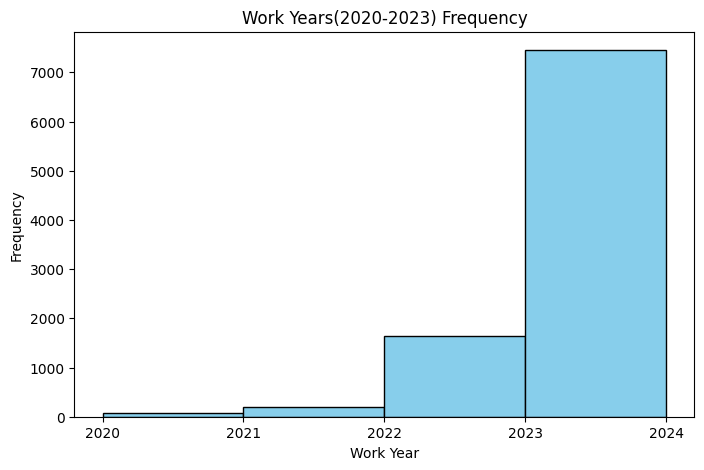

In [ ]:
# get frequency of each year #

from matplotlib.ticker import MaxNLocator
# data
wy_range = np.arange(work_year.min(),work_year.max()+1.5,1)
# print(wy_range)
count = work_year.count()

# plot graph
plt.figure(figsize=(8,5))
plt.hist(work_year,bins=wy_range,color='skyblue',edgecolor='black')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# create plot descriptors
plt.title('Work Years(2020-2023) Frequency')
plt.xlabel('Work Year')
plt.ylabel('Frequency')

plt.show()


<ipython-input-14-e0d86f17f26e>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  cat=sns.catplot(x='work_year',y='salary',kind='point',ci=False,data=df)


<Figure size 800x500 with 0 Axes>

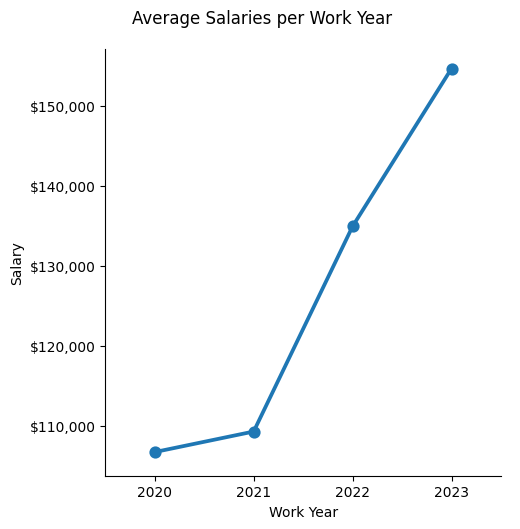

In [ ]:
# Get Average Salaries for each year (cat plot) #

# plot graph
plt.figure(figsize=(8,5))
cat=sns.catplot(x='work_year',y='salary',kind='point',ci=False,data=df)
cat.fig.suptitle('Average Salaries per Work Year',y=1.05)

# apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

# create plot descriptors
plt.xlabel('Work Year')
plt.ylabel('Salary')

plt.show()


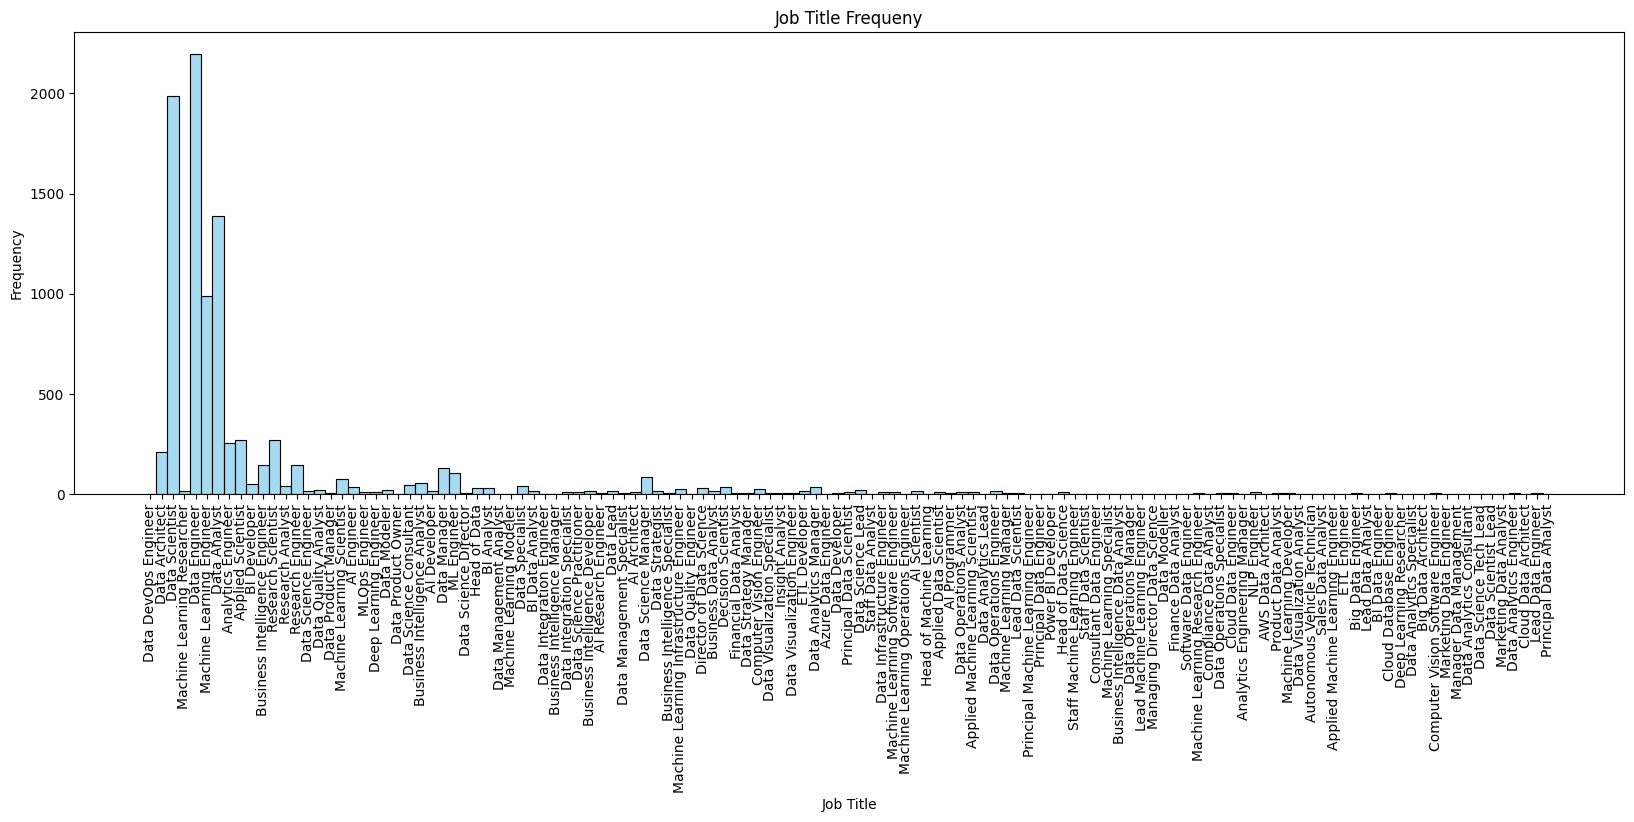

In [ ]:
# Get frequency of job titles #

# data
range = job_title.nunique()
count = job_title.count()

# plot graph
fig = plt.figure(figsize=(20,6))
sns.histplot(data=df, bins=range, x='job_title', color='skyblue', edgecolor='black')

# create plot descriptors
plt.title('Job Title Frequeny')
plt.xlabel('Job Title')
plt.xticks(rotation=90)
plt.ylabel('Frequency')

plt.show()


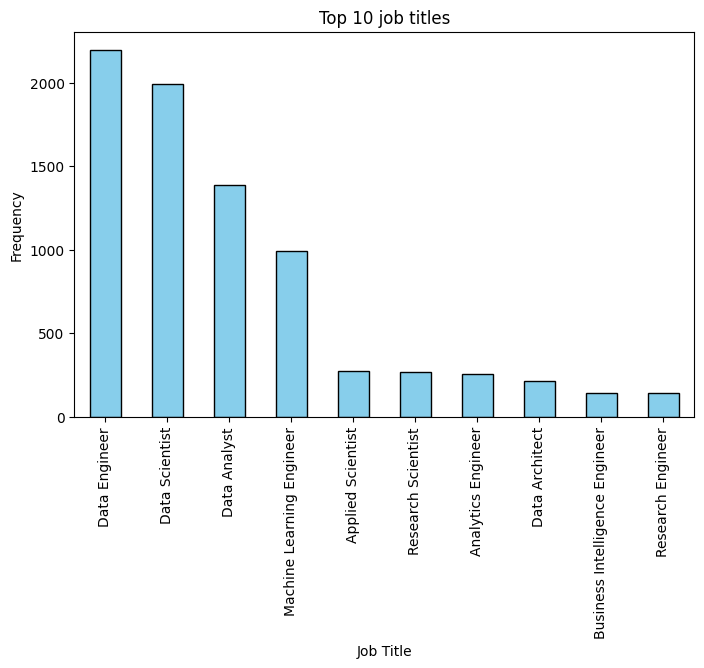

In [ ]:
# Get the top 10 most common data jobs #

# top 10 job_title data
top_values = job_title.value_counts().head(10)

# plot graph
plt.figure(figsize=(8, 5))
top_values.plot(kind='bar', color='skyblue', edgecolor='black')

# create plot descriptors
plt.title('Top 10 job titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')

plt.show()

<ipython-input-11-7d755d570eb2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='salary', x='job_title', data=sorted_df, palette='viridis')


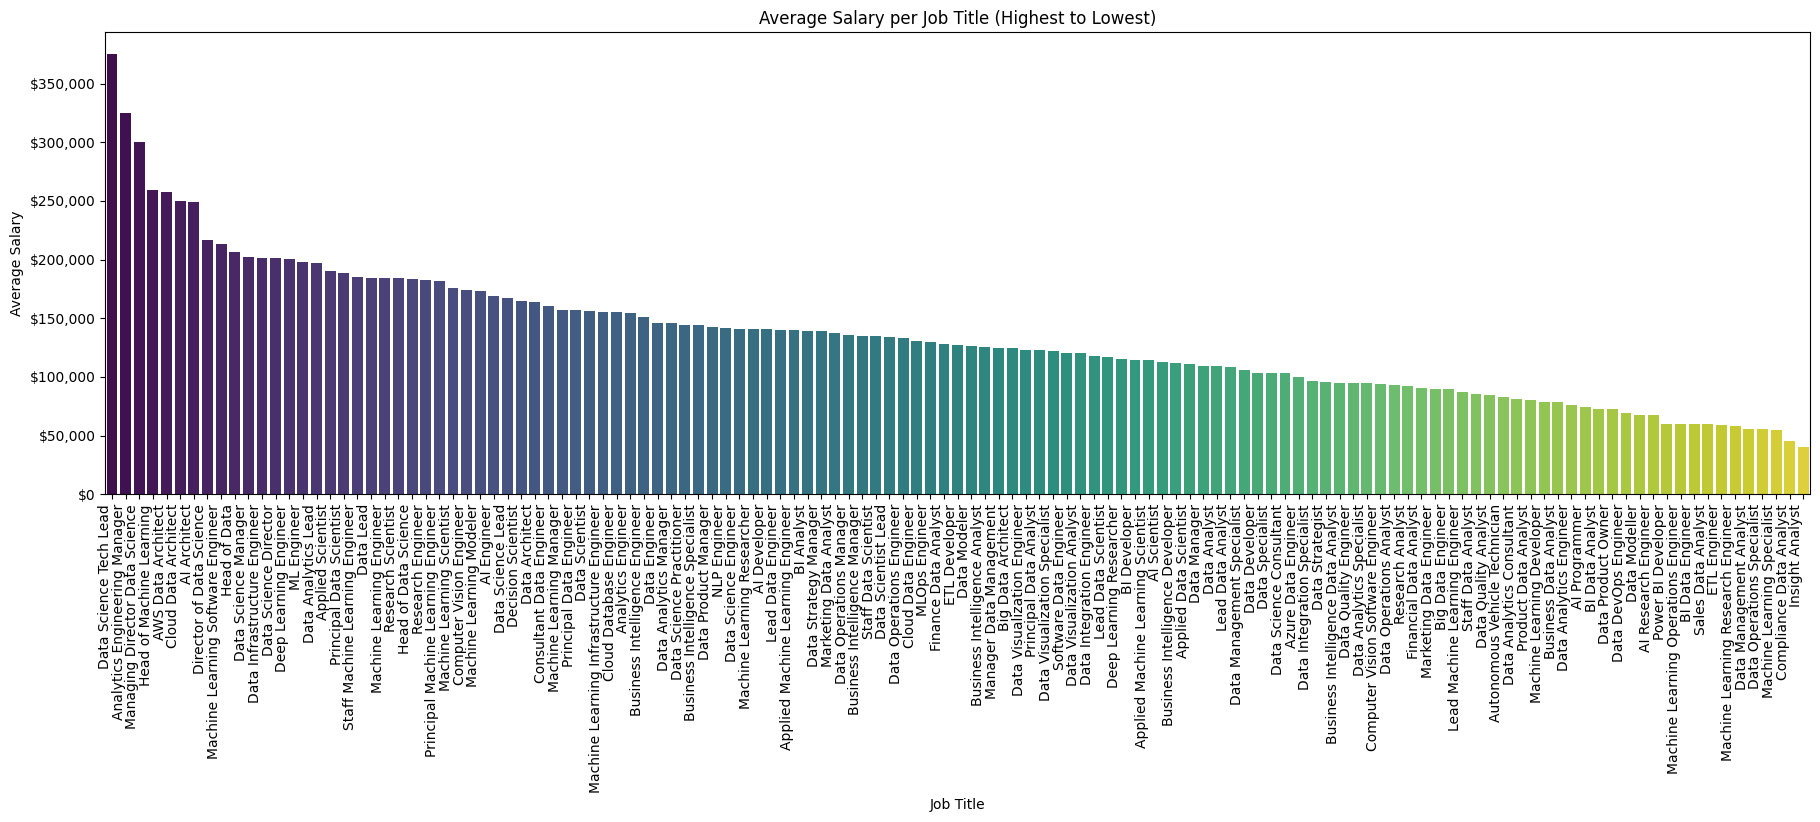

In [ ]:
# Visualize average salaries by job titles and the top job_titles with highest average salaries and least average salaries #

# calculate average salary per job title
avg_salary_per_job = df.groupby('job_title')['salary'].mean().reset_index()

# sort df by average salary in descending order
sorted_df = avg_salary_per_job.sort_values(by='salary', ascending=False)

# plot graph
plt.figure(figsize=(22, 6))  # Optional: Adjust the figure size
sns.barplot(y='salary', x='job_title', data=sorted_df, palette='viridis')

# create plot descriptors
plt.xticks(rotation=90,ha='right')
plt.ylabel('Average Salary')
plt.xlabel('Job Title')
plt.title('Average Salary per Job Title (Highest to Lowest)')

# apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.show()

<ipython-input-193-c4c6c07a93c6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='job_title', y='salary', data=filtered_df, palette='viridis')


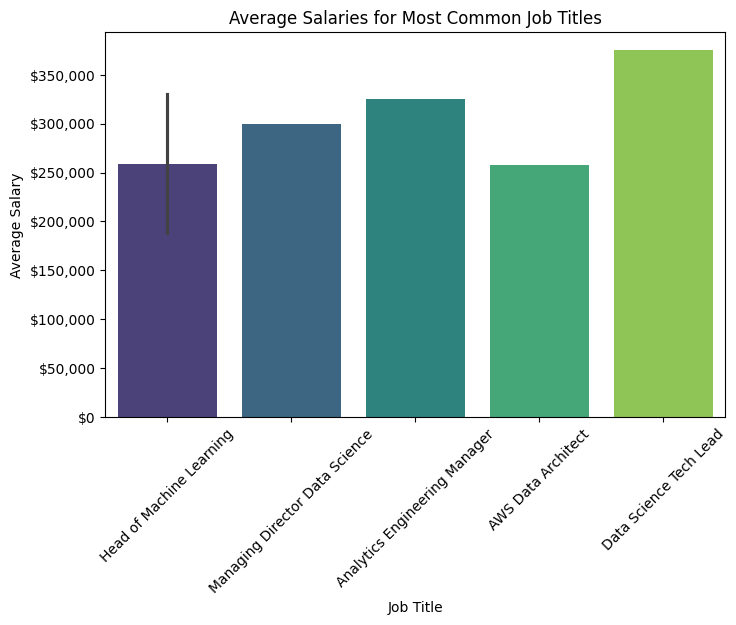

In [ ]:
# Visualize Average Salaries for the most common job titles

# calculate average salary per job title
avg_salary_per_job = df.groupby('job_title')['salary'].mean().reset_index()

# identify the top 5 job titles based on average salary
top_5_job_titles = avg_salary_per_job.nlargest(5, 'salary')['job_title']

# filter the dataset for the top 5 job titles
filtered_df = df[df['job_title'].isin(top_5_job_titles)]

# plot graph
plt.figure(figsize=(8, 5))  # Optional: Adjust the figure size
sns.barplot(x='job_title', y='salary', data=filtered_df, palette='viridis')

# create plot descriptors
plt.xticks(rotation=45)
plt.ylabel('Average Salary')
plt.xlabel('Job Title')
plt.title('Average Salaries for Most Common Job Titles')

# apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Data Engineering'),
  Text(1, 0, 'Data Architecture and Modeling'),
  Text(2, 0, 'Data Science and Research'),
  Text(3, 0, 'Machine Learning and AI'),
  Text(4, 0, 'Data Analysis'),
  Text(5, 0, 'Leadership and Management'),
  Text(6, 0, 'BI and Visualization'),
  Text(7, 0, 'Data Quality and Operations'),
  Text(8, 0, 'Data Management and Strategy'),
  Text(9, 0, 'Cloud and Database')])

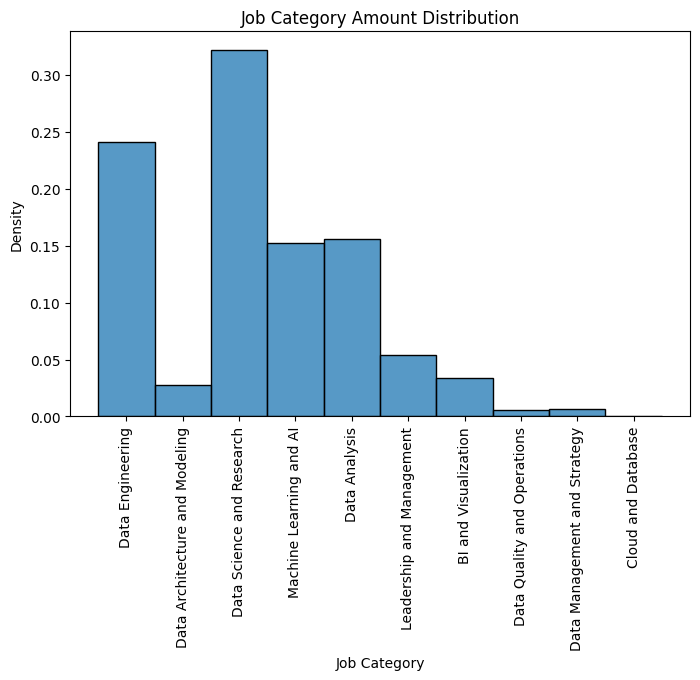

In [ ]:
# Visualize distribution of job categories #

# plot graph
fig = plt.figure(figsize=(8,5))
job_category = df['job_category']
sns.histplot(job_category, discrete=True, kde=False, stat='probability')

# plot descriptors
plt.title('Job Category Amount Distribution');
plt.xlabel('Job Category')
plt.ylabel('Density')
plt.xticks(rotation=90)

<ipython-input-194-12570ebdc8e9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='salary', x='job_category', data=df, palette='viridis')


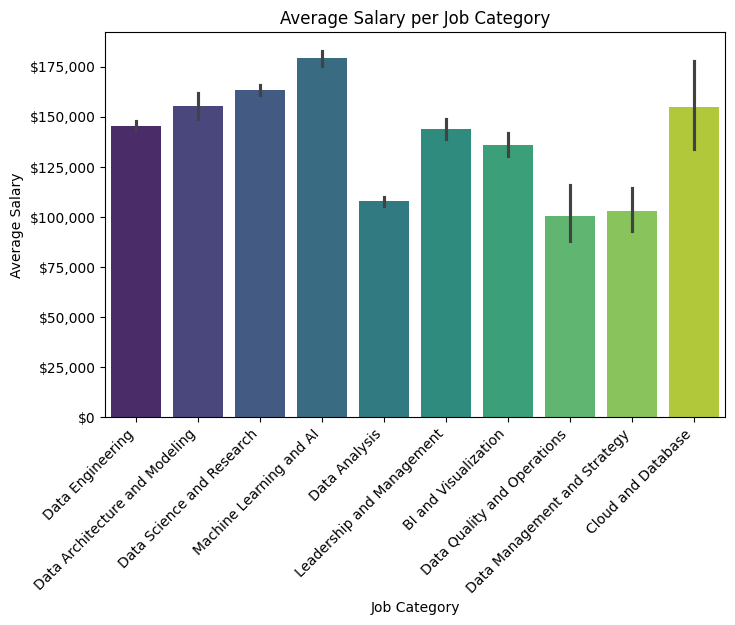

In [ ]:
# Calculate average salary per job category
avg_salary_per_job = df.groupby('job_category')['salary'].mean().reset_index()

# sort the df by average salary in descending order
sorted_df = avg_salary_per_job.sort_values(by='salary', ascending=False)

# plot graph
plt.figure(figsize=(8, 5))  # Optional: Adjust the figure size
sns.barplot(y='salary', x='job_category', data=df, palette='viridis')

# plot descriptors
plt.xticks(rotation=45,ha='right')
plt.ylabel('Average Salary')
plt.xlabel('Job Category')
plt.title('Average Salary per Job Category')

# apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.show()


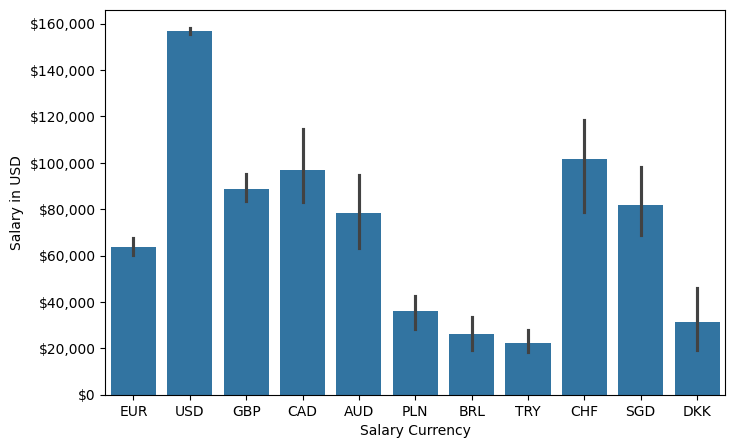

In [ ]:
# Visualize average salary in usd based on currency #

# plot graph
fig=plt.figure(figsize=(8,5))
sns.barplot(x='salary_currency',y='salary_in_usd',data=df)

# create plot descriptors
cat.fig.suptitle('Average Salary per Current',y=1.05)
plt.xlabel('Salary Currency')
plt.ylabel('Salary in USD')

# apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.show()

def format_dollars(value, _):
    return f'${value:,.0f}'


<ipython-input-14-c71505843b6a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='employee_residence', y='salary', hue='company_location', data=df, ci=None)


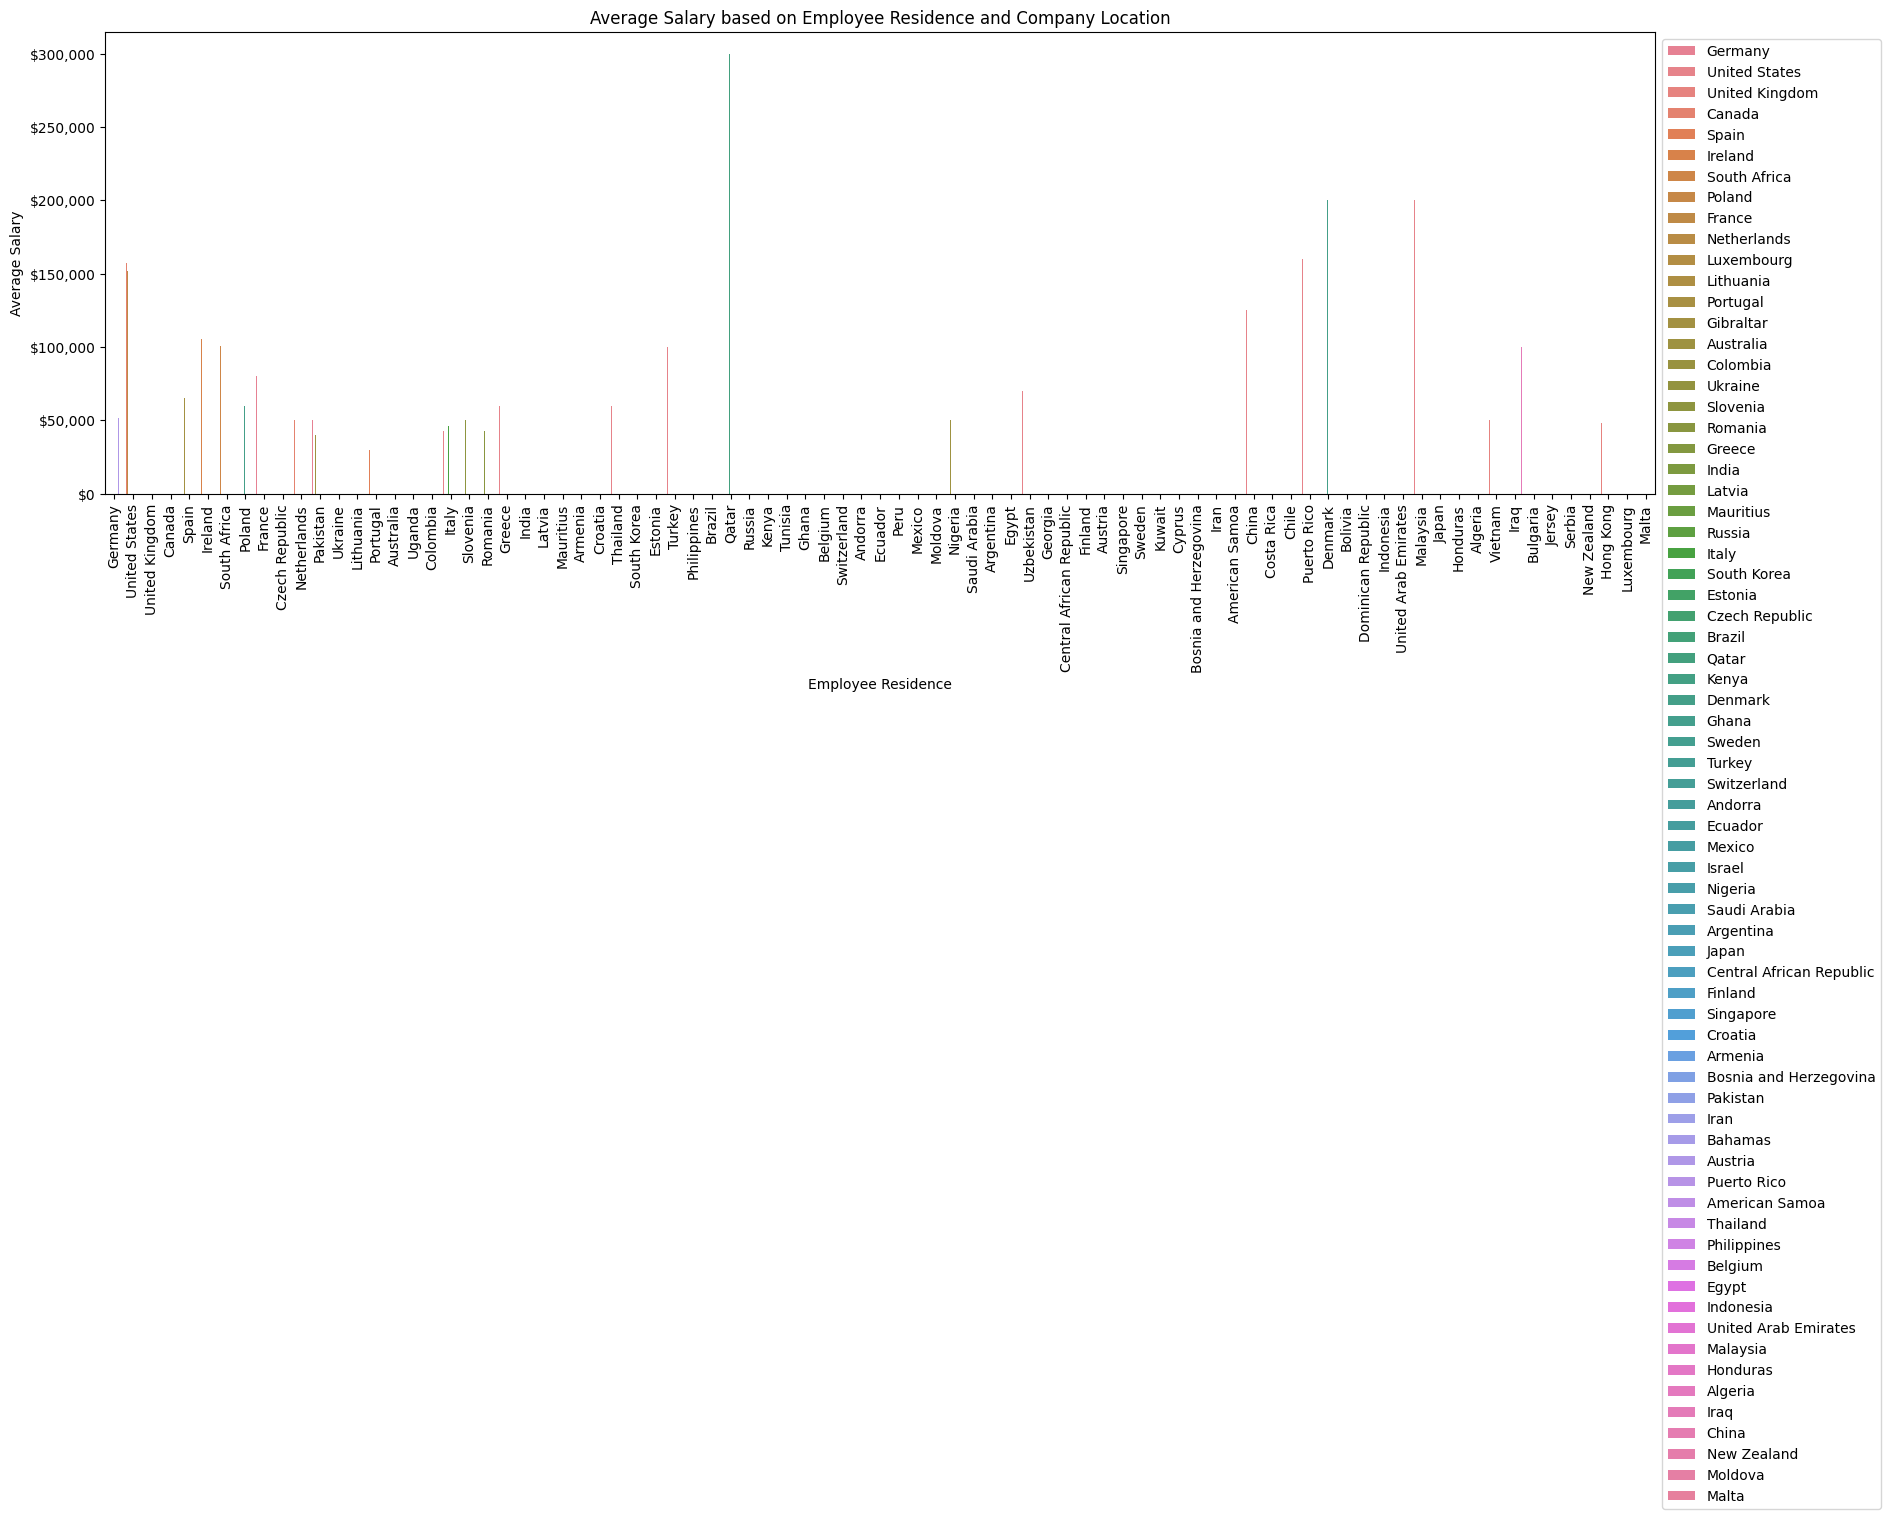

In [14]:
# Visualize average salary based on employee residence and company location #

# plot graph
plt.figure(figsize=(20, 6))
sns.barplot(x='employee_residence', y='salary', hue='company_location', data=df, ci=None)

# create plot descriptors
plt.xticks(rotation=90)
plt.xlabel('Employee Residence')
plt.ylabel('Average Salary')
plt.title('Average Salary based on Employee Residence and Company Location')

# move the legend to the right
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.show()

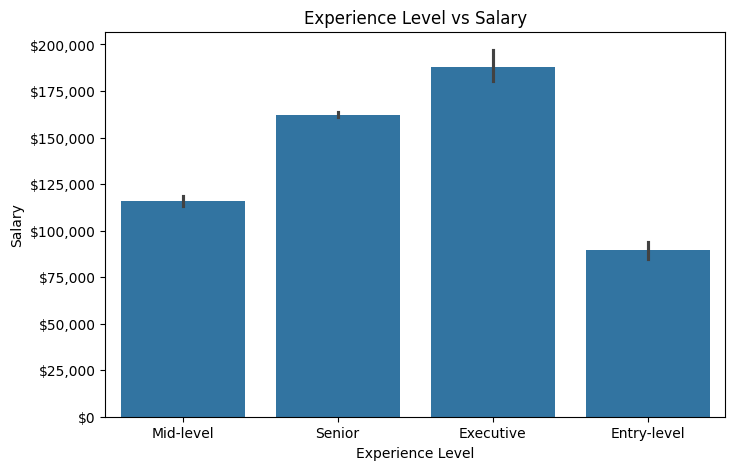

In [ ]:
# Visualize salary based on experience level #

# plot graph
plt.figure(figsize=(8,5))
sns.barplot(x='experience_level',y='salary',data=df)

# plot descriptors
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.title('Experience Level vs Salary')

# apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.show()


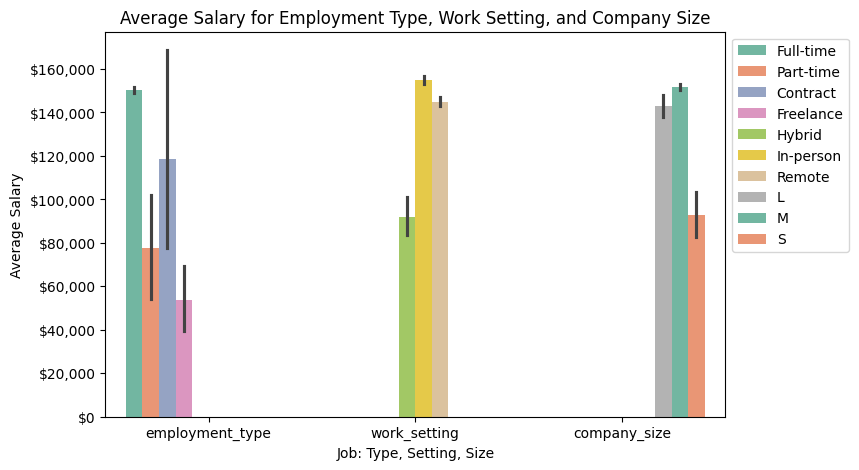

In [13]:
# Visualize average salary based on employment type, work setting and company_size #

# Melt the DataFrame to have a single 'Category' column for 'employment_type', 'work_setting', and 'company_size'
melted_df = pd.melt(df, id_vars='salary', value_vars=['employment_type', 'work_setting', 'company_size'],
                    var_name='category', value_name='category_type')

# plot graph
plt.figure(figsize=(8, 5))
sns.barplot(x='category', y='salary', hue='category_type', data=melted_df, palette='Set2')

# plot descriptors
plt.xlabel('Job: Type, Setting, Size')
plt.ylabel('Average Salary')
plt.title('Average Salary for Employment Type, Work Setting, and Company Size')

# move the legend to the right
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.show()